In [ ]:
!pip -q install n2v

In [ ]:
import tensorflow as tf
import n2v
from n2v.models import N2VConfig, N2V
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
import os
import cv2
import numpy as np
from csbdeep.utils import plot_history
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
images_dir = '/content/drive/MyDrive/Project/Image Segmentation/NoisyImages/'

In [ ]:
def get_data(images_dir):
  images_path_list = [os.path.join(images_dir, x) for x in sorted(os.listdir(images_dir))]
  return images_path_list

In [ ]:
images_path_list = get_data(images_dir)

In [ ]:
def read_image(path, height, width):
    image = cv2.imread(path)
    image = cv2.resize(image, (height, width))
    image = image/255.0
    image = image.astype(np.float32)
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
def build_data(images_path_list, height, width):
  data = []
  for i, (image_path) in tqdm(enumerate(images_path_list)):
    image = read_image(image_path, height, width)
    data.append(image)
  return data

In [ ]:
height = 200 
width = 200

In [ ]:
whole_data = build_data(images_path_list, height, width)
data = whole_data[:400]

0it [00:00, ?it/s]

In [ ]:
print('Size of Data: ',len(data))
print('Shape of Data: ',data[0].shape)
print('Type of Data: ',data[0].dtype)

Size of Data:  400
Shape of Data:  (1, 200, 200, 3)
Type of Data:  float32


In [ ]:
def show_image(image, title='', cmap = None):
  plt.imshow(image, cmap=cmap, alpha=1)
  if title is not None:
    plt.title(title)
  plt.axis('off')

In [ ]:
def display_dataset(data):
  plt.figure(figsize=(10,7))
  for i in tqdm(range(15)):
    plt.subplot(3,5,i+1)
    id = np.random.randint(len(data))
    image = np.squeeze(data[id], axis=0)
    show_image(image, cmap='gray')
  plt.tight_layout()
  plt.suptitle('Dataset', size=16)
  plt.show()

  0%|          | 0/15 [00:00<?, ?it/s]

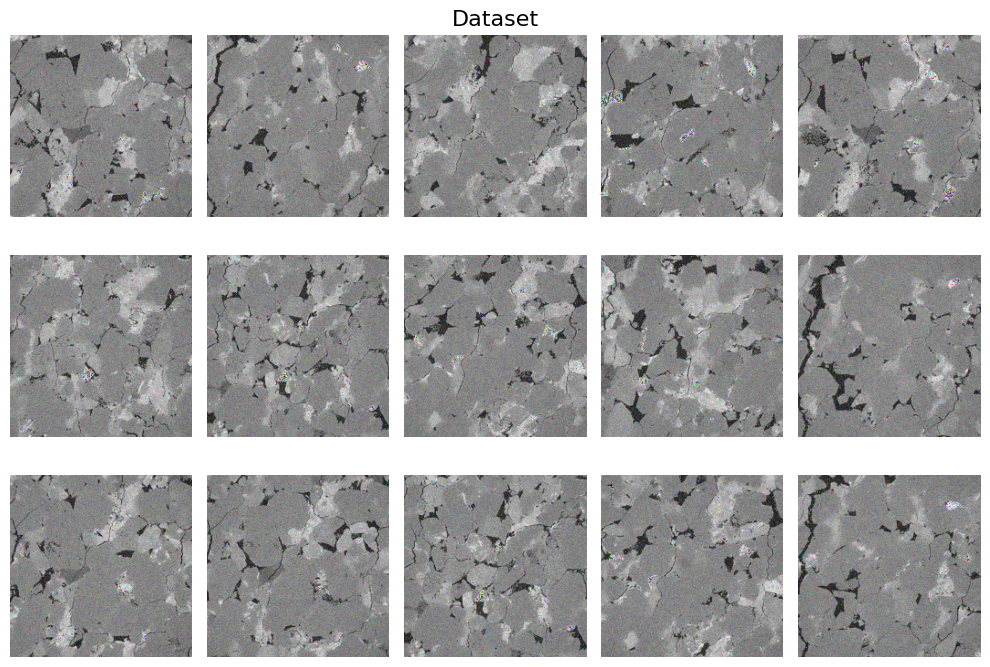

In [ ]:
display_dataset(data)

In [ ]:
datagen = N2V_DataGenerator()

In [ ]:
patch_size = 64
patch_shape = (patch_size, patch_size)
patches = datagen.generate_patches_from_list(np.array(data), shape=patch_shape)

Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (72, 64, 64, 3)
Generated patches: (

In [ ]:
train_val_split = int(patches.shape[0] * 0.8)
X = patches[:train_val_split]
X_val = patches[train_val_split:]

In [ ]:
print('Size of Train Data: ',len(X))
print('Shape of Train Data: ',X[0].shape)
print('Type of Train Data: ',X[0].dtype)

Size of Train Data:  23040
Shape of Train Data:  (64, 64, 3)
Type of Train Data:  float32


In [ ]:
print('Size of Test Data: ',len(X_val))
print('Shape of Test Data: ',X_val[0].shape)
print('Type of Test Data: ',X_val[0].dtype)

Size of Test Data:  5760
Shape of Test Data:  (64, 64, 3)
Type of Test Data:  float32


In [ ]:
train_batch = 32
config = N2VConfig(X, unet_kern_size=3, unet_n_first=64, unet_n_depth=3, train_steps_per_epoch=int(X.shape[0]/train_batch), train_epochs=20, train_loss='mse', 
                   batch_norm=True, train_batch_size=train_batch, n2v_perc_pix=0.198, n2v_patch_shape=(patch_size, patch_size), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, single_net_per_channel=False)

In [ ]:
model_name = 'n2v_2D_stars'
basedir = 'models'
model = N2V(config, model_name, basedir=basedir)

In [ ]:
history = model.train(X, X_val)

8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 5760/5760 [00:04<00:00, 1312.25it/s]


Epoch 1/20
720/720 [==============================] - 42s 46ms/step - loss: 0.3343 - n2v_mse: 0.3343 - n2v_abs: 0.4360 - val_loss: 0.5071 - val_n2v_mse: 0.5071 - val_n2v_abs: 0.5178 - lr: 4.0000e-04
Epoch 2/20
720/720 [==============================] - 32s 44ms/step - loss: 0.2977 - n2v_mse: 0.2977 - n2v_abs: 0.4143 - val_loss: 0.5102 - val_n2v_mse: 0.5102 - val_n2v_abs: 0.5196 - lr: 4.0000e-04
Epoch 3/20
720/720 [==============================] - 32s 44ms/step - loss: 0.2883 - n2v_mse: 0.2883 - n2v_abs: 0.4092 - val_loss: 0.5364 - val_n2v_mse: 0.5364 - val_n2v_abs: 0.5273 - lr: 4.0000e-04
Epoch 4/20
720/720 [==============================] - 31s 44ms/step - loss: 0.2889 - n2v_mse: 0.2889 - n2v_abs: 0.4083 - val_loss: 0.5205 - val_n2v_mse: 0.5205 - val_n2v_abs: 0.5195 - lr: 4.0000e-04
Epoch 5/20
720/720 [==============================] - 31s 43ms/step - loss: 0.2873 - n2v_mse: 0.2873 - n2v_abs: 0.4067 - val_loss: 0.5013 - val_n2v_mse: 0.5013 - val_n2v_abs: 0.5085 - lr: 4.0000e-04
Epoch

In [ ]:
print(sorted(list(history.history.keys())))

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


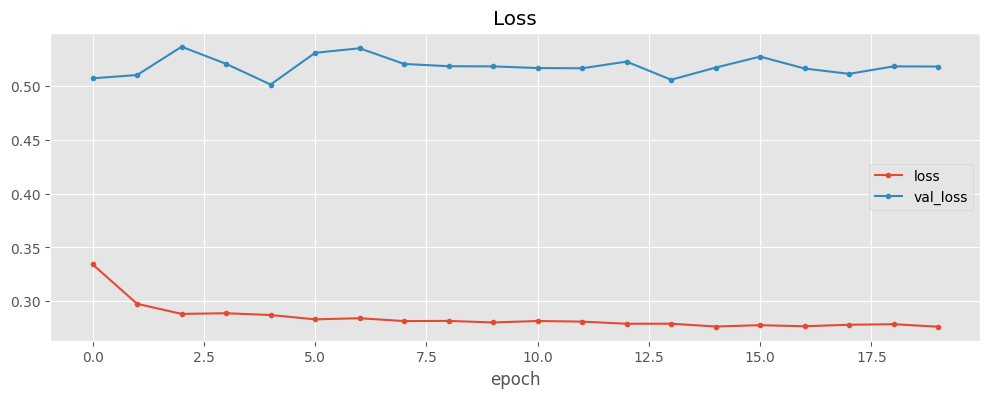

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Loss")
plot_history(history,['loss','val_loss'])
plt.show()

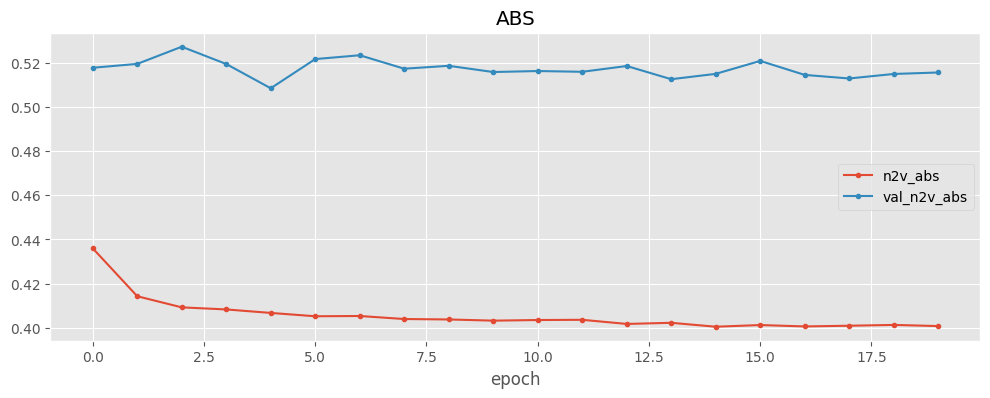

In [ ]:
plt.figure(figsize=(12,4))
plt.title("ABS")
plot_history(history,['n2v_abs','val_n2v_abs'])
plt.show()

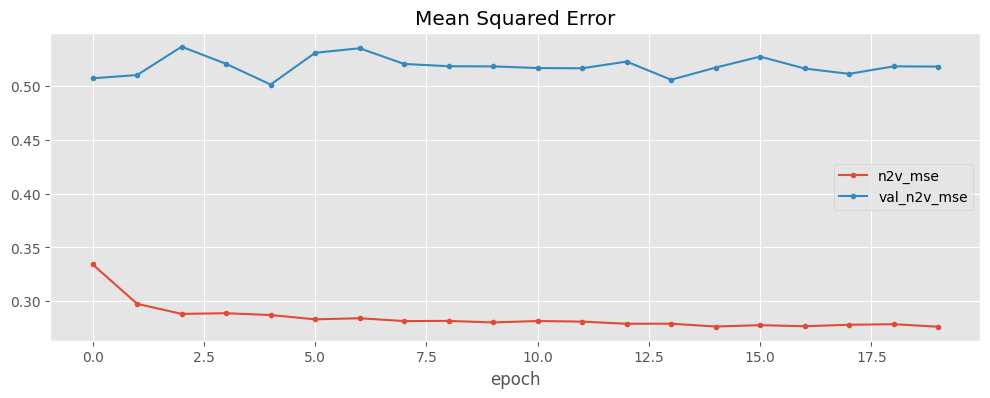

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Mean Squared Error")
plot_history(history,['n2v_mse','val_n2v_mse'])
plt.show()

In [ ]:
from numpy.random import randint

In [ ]:
data_2 =  whole_data[401:]

In [ ]:
print('Size of Validation Data: ', len(data_2))
print('Shape of Validation Data: ', data_2[0].shape)
print('Type of Validation Data: ', data_2[0].dtype)

Size of Validation Data:  209
Shape of Validation Data:  (1, 200, 200, 3)
Type of Validation Data:  float32


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


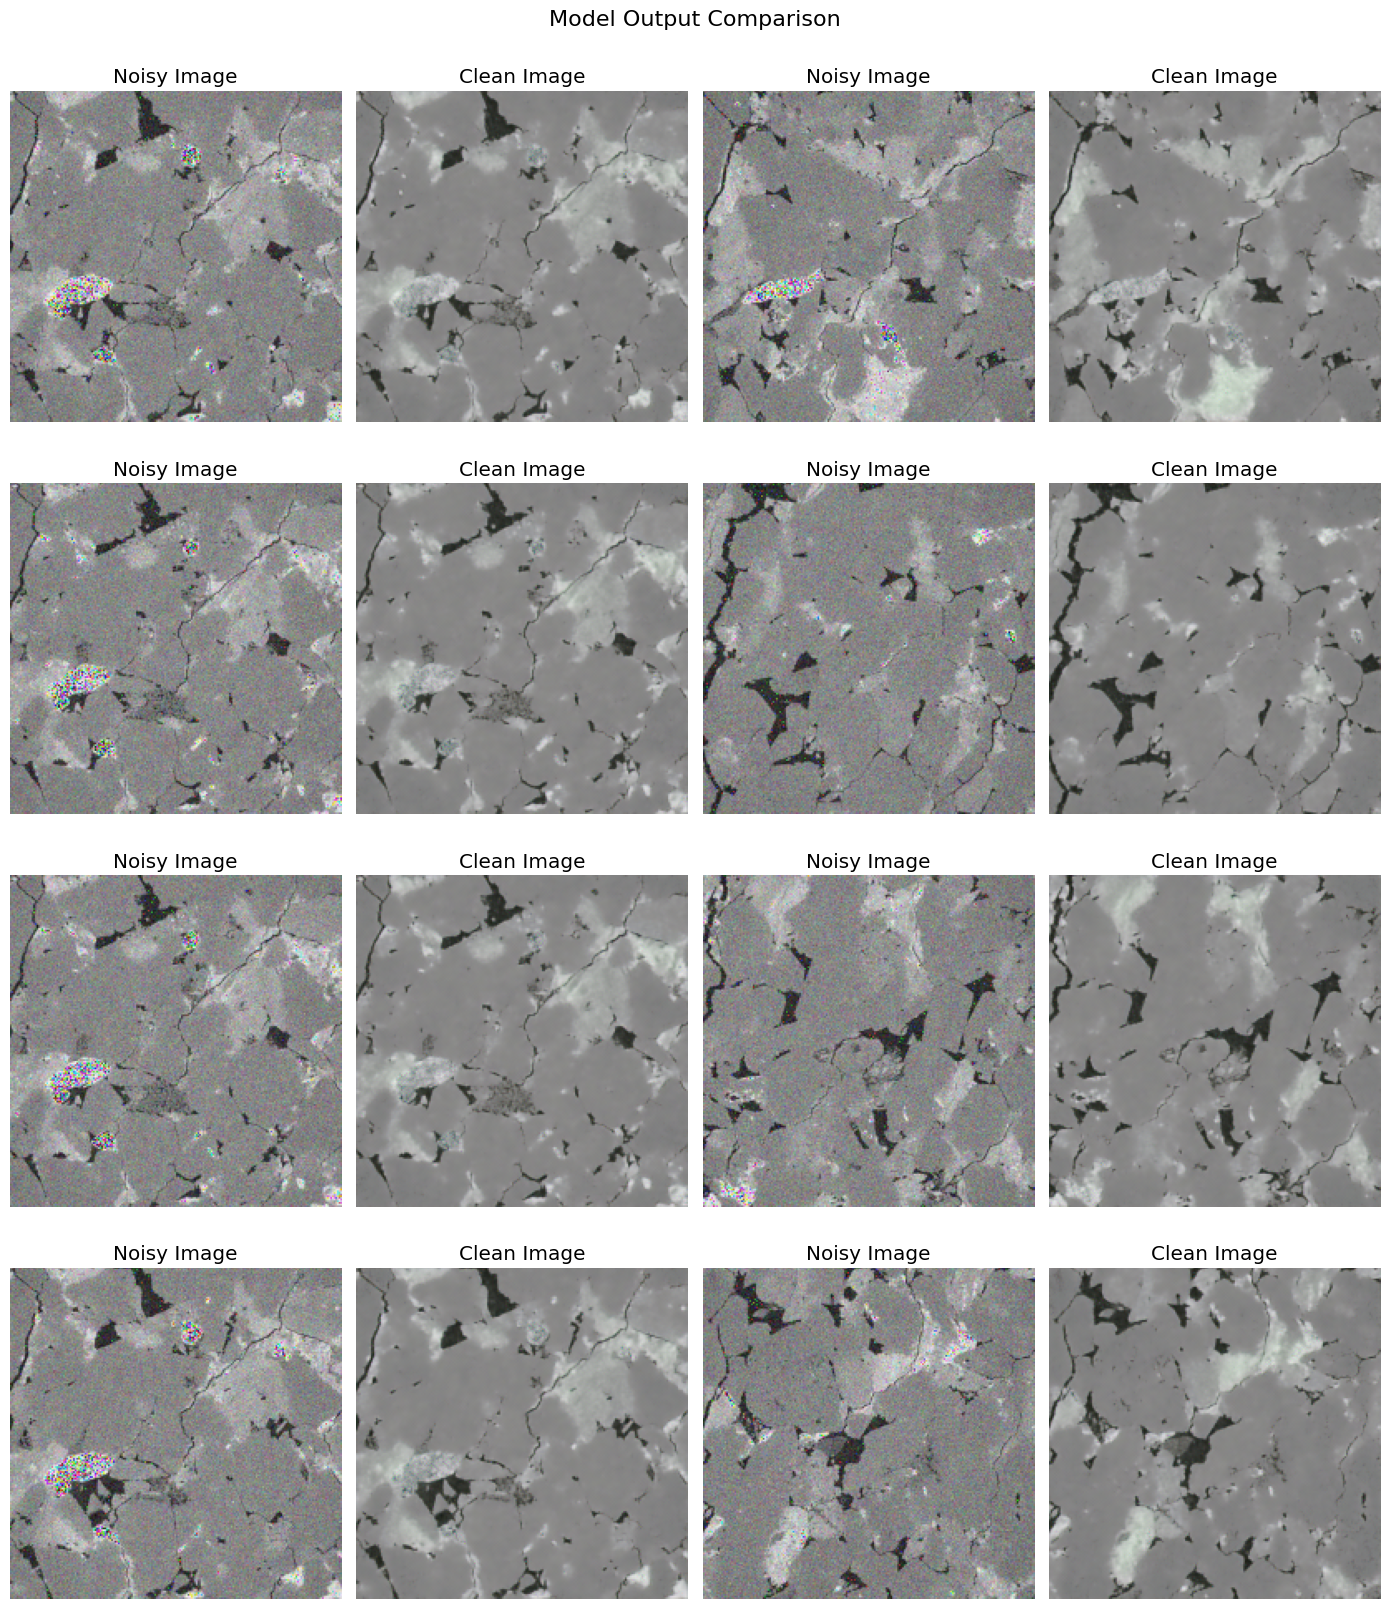

In [ ]:
plt.figure(figsize=(14,16))
id = randint(0, len(data_2))
n = 0
pred_out = None
for i in tqdm(range(16)):
  plt.subplot(4,4,i+1)
  
  if n==0:
    noisy_image = np.squeeze((data_2[id] * 255).astype(np.uint8), axis=0)
    show_image(noisy_image, title='Noisy Image')
    
    n+=1
  elif n==1:
    gen_image = model.predict(np.squeeze(data_2[id], axis=0), axes='YXC')
    show_image(gen_image, title='Clean Image')
    n=0
    id = randint(0, len(data_2))
plt.tight_layout()
plt.suptitle('Model Output Comparison', y = 1.02, size=16)
plt.show()